In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")

In [4]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [5]:
df.shape

(2000, 10)

In [6]:
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [8]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
df["Location"].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

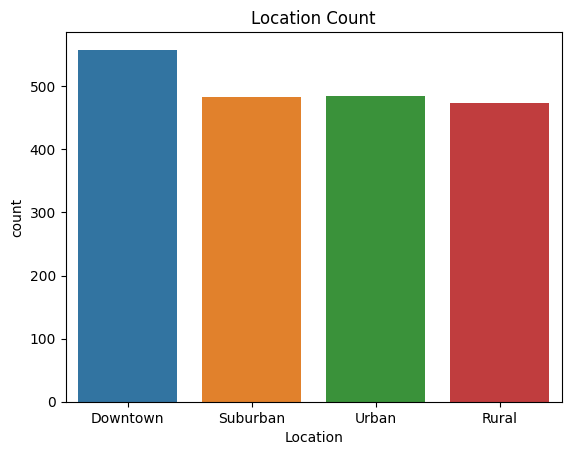

In [10]:
sns.countplot(x = "Location",data = df)
plt.title("Location Count")
plt.show()

In [11]:
df["Condition"].value_counts()

Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64

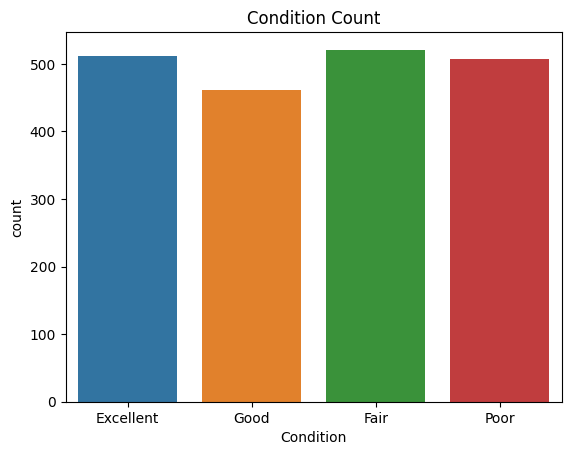

In [12]:
sns.countplot(x = "Condition",data = df)
plt.title("Condition Count")
plt.show()

In [13]:
df["Garage"].value_counts()

Garage
No     1038
Yes     962
Name: count, dtype: int64

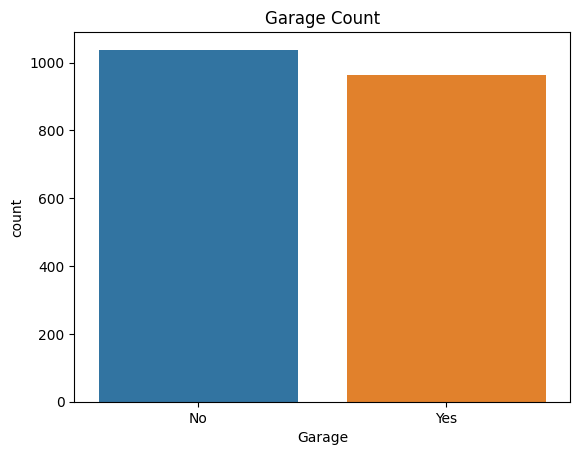

In [14]:
sns.countplot(x = "Garage",data = df)
plt.title("Garage Count")
plt.show()

In [15]:
df["Bedrooms"].value_counts()

Bedrooms
1    418
3    406
4    405
5    403
2    368
Name: count, dtype: int64

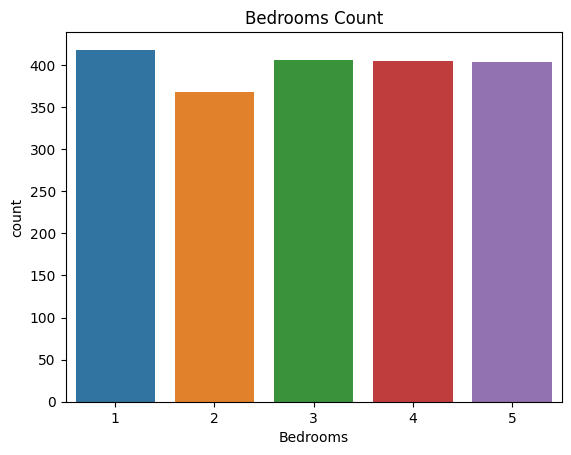

In [16]:
sns.countplot(x = "Bedrooms",data = df)
plt.title("Bedrooms Count")
plt.show()

In [17]:
df["Bathrooms"].value_counts()

Bathrooms
3    524
4    521
2    494
1    461
Name: count, dtype: int64

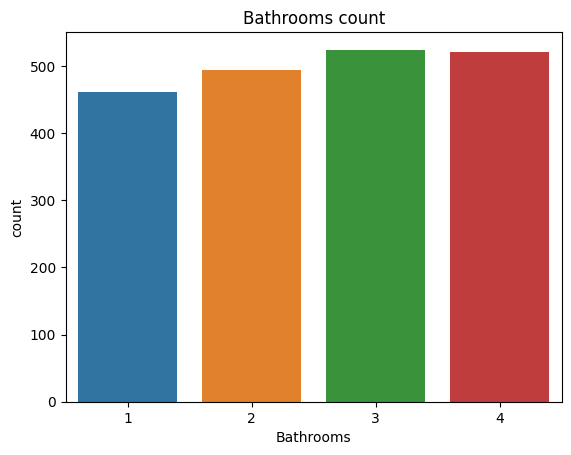

In [18]:
sns.countplot(x = "Bathrooms",data=df)
plt.title("Bathrooms count")
plt.show()

In [19]:
df.drop(columns=["Id"],inplace = True,)

In [20]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
Location_en =  LabelEncoder()
df["Location"] = Location_en.fit_transform(df["Location"])

In [23]:
Condition_en =  LabelEncoder()
df["Condition"] = Condition_en.fit_transform(df["Condition"])

In [24]:
Garage_en =  LabelEncoder()
df["Garage"] = Condition_en.fit_transform(df["Garage"])

In [25]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056


In [26]:
x = df.drop(columns=['Price'])
y = df["Price"]

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [28]:
x = pd.DataFrame(x, columns=df.columns)

In [29]:
x.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,-1.101471,1.401791,1.305568,1.244151,0.238155,-1.274332,-1.316267,-0.962695,-1.403091
1,1.147485,1.401791,1.305568,1.244151,-0.095942,-1.274332,-1.316267,-0.962695,-0.407725
2,0.622317,-0.704581,-0.498326,1.244151,-0.652770,-1.274332,0.460072,-0.962695,-0.980356
3,-1.405759,0.699667,-0.498326,0.008035,-1.655061,0.486403,-0.428098,1.038750,-1.062589
4,1.652574,-1.406705,1.305568,0.008035,0.377363,-1.274332,-0.428098,1.038750,0.355982


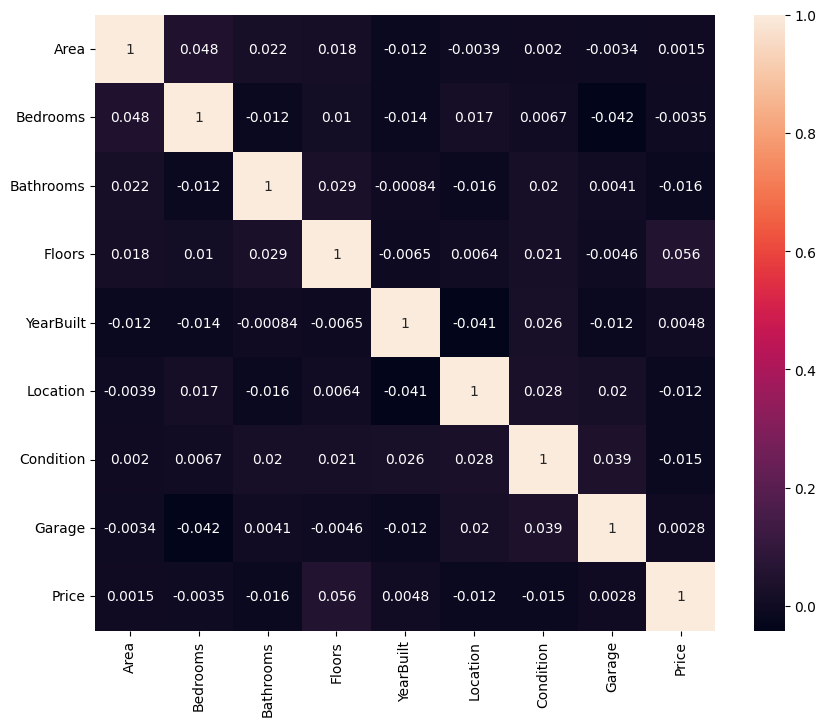

In [30]:
plt.figure(figsize = (10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [31]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (2000, 9)
Shape of y: (2000,)


In [32]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [35]:
Lasso_test = Lasso ()
Lasso_test.fit(x_train,y_train)
Lasso_test.score(x_test,y_test)*100 ,Lasso_test.score(x_train,y_train)*100

(99.9999999987408, 99.9999999987434)

In [36]:
mean_squared_error(y_test ,Lasso_test.predict(x_test)),mean_absolute_error(y_test ,Lasso_test.predict(x_test))

(0.8803611264980913, 0.7993447573464073)

In [37]:
x_test

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
405,-1.677611,-0.704581,-1.400273,1.244151,-0.123783,0.486403,0.460072,-0.962695,1.534157
1190,-0.322986,-1.406705,-1.400273,0.008035,0.405204,-0.393965,0.460072,1.038750,-1.398832
1132,1.678060,-1.406705,-1.400273,0.008035,-1.265281,0.486403,0.460072,1.038750,-1.664764
731,0.495659,-0.002457,0.403621,0.008035,-0.541404,-1.274332,0.460072,-0.962695,0.493640
1754,0.270918,-0.704581,-1.400273,1.244151,0.210314,-0.393965,0.460072,1.038750,-0.420502
...,...,...,...,...,...,...,...,...,...
638,-0.308312,0.699667,-0.498326,0.008035,-0.736294,0.486403,1.348241,1.038750,-0.504328
360,-0.016380,-0.002457,1.305568,-1.228081,0.711460,-0.393965,-1.316267,1.038750,-1.091211
1810,0.159706,-0.002457,1.305568,1.244151,-0.875501,-1.274332,1.348241,-0.962695,-1.150959
1743,0.689508,1.401791,-1.400273,1.244151,0.683618,-0.393965,-1.316267,1.038750,-0.671617


In [38]:
Lasso_test.predict([[-1.677611,0.704581,-1.400273,1.244151,-0.123783,0.486403,0.460072,-0.962695,1.534157]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([961654.55763656])

In [39]:
y_test.head()

405     961656
1190    151096
1132     77603
731     674099
1754    421467
Name: Price, dtype: int64